https://www.kaggle.com/datasets/aleshagavrilov/parishousing

aleshagavrilov/parishousing

https://www.kaggle.com/datasets/moonnectar/car-auction-sale-data-ebay-sold-listings

moonnectar/car-auction-sale-data-ebay-sold-listings

## Mengunduh Data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ronimerdiansah","key":"348f3c0ae2b3fdaae4760582c857b6e3"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d aleshagavrilov/parishousing

  0% 0.00/319k [00:00<?, ?B/s]
100% 319k/319k [00:00<00:00, 82.7MB/s]


In [ ]:
!mkdir parishousing
!unzip parishousing.zip -d parishousing
!ls parishousing

Archive:  parishousing.zip
  inflating: parishousing/ParisHousing.csv  
ParisHousing.csv


## Mempersiapkan Data

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt, numpy as np
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)
from functools import reduce

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/parishousing/ParisHousing.csv')

In [ ]:
df

,Unnamed: 0,squareMeters,numberOfRooms,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category,PoolAndYard
0,0,75523,three,63,9373,3,8,2005,False,True,4313,9005,956,False,7,7559081.5,Basic,has pool and no yard
1,1,80771,thirty-nine,98,39381,8,6,2015,True,False,3653,2436,128,True,2,8085989.5,Luxury,has pool and has yard
2,2,55712,fifty-eight,19,34457,6,8,2021,False,False,2937,8852,135,True,9,5574642.1,Basic,has pool and no yard
3,3,32316,forty-seven,6,27939,10,4,2012,False,True,659,7141,359,False,3,3232561.2,Basic,no pool and no yard
4,4,70429,nineteen,90,38045,3,7,1990,True,False,8435,2429,292,True,4,7055052.0,Luxury,has pool and has yard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1726,eighty-nine,5,73133,7,6,2009,False,True,9311,1698,218,False,4,176425.9,Basic,has pool and no yard
9996,9996,44403,twenty-nine,12,34606,9,4,1990,False,True,9061,1742,230,False,0,4448474.0,Basic,has pool and has yard
9997,9997,83841,three,69,80933,10,10,2005,True,True,8304,7730,345,True,9,8390030.5,Basic,no pool and no yard
9998,9998,59036,seventy,96,55856,1,3,2010,False,True,2590,6174,339,True,4,5905107.0,Basic,no pool and no yard


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         10000 non-null  int64  
 1   squareMeters       10000 non-null  int64  
 2   numberOfRooms      10000 non-null  object 
 3   floors             10000 non-null  int64  
 4   cityCode           10000 non-null  int64  
 5   cityPartRange      10000 non-null  int64  
 6   numPrevOwners      10000 non-null  int64  
 7   made               10000 non-null  int64  
 8   isNewBuilt         10000 non-null  bool   
 9   hasStormProtector  10000 non-null  bool   
 10  basement           10000 non-null  int64  
 11  attic              10000 non-null  int64  
 12  garage             10000 non-null  int64  
 13  hasStorageRoom     10000 non-null  bool   
 14  hasGuestRoom       10000 non-null  int64  
 15  price              10000 non-null  float64
 16  category           1000

## Membersihkan Data

### Cek Nilai Null

In [ ]:
df.isnull().sum()

Unnamed: 0           0
squareMeters         0
numberOfRooms        0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
PoolAndYard          0
dtype: int64

Tidak terdapat nilai null

### Menghapus Kolom yang Tidak Dibutuhkan

In [ ]:
droped_df = df.drop(['Unnamed: 0', 'cityCode'], axis=1)

### Format Ulang String

In [ ]:
droped_df['numberOfRooms'] = droped_df['numberOfRooms'].str.replace('-', ' ')

In [ ]:
droped_df[['numberOfRooms']]

,numberOfRooms
0,three
1,thirty nine
2,fifty eight
3,forty seven
4,nineteen
...,...
9995,eighty nine
9996,twenty nine
9997,three
9998,seventy


In [ ]:
pip install word2number

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5582 sha256=e7277ce3323da7d084f997eecddd1864b3b95e4c266430f7ae89501302da44ff
  Stored in directory: /root/.cache/pip/wheels/4b/c3/77/a5f48aeb0d3efb7cd5ad61cbd3da30bbf9ffc9662b07c9f879
Successfully built word2number


In [ ]:
from word2number import w2n

droped_df['numberOfRooms'] = droped_df['numberOfRooms'].apply(w2n.word_to_num)

In [ ]:
droped_df[['numberOfRooms']]

,numberOfRooms
0,3
1,39
2,58
3,47
4,19
...,...
9995,89
9996,29
9997,3
9998,70


Sekarang kolom `numberOfRooms` sudah menjadi numerikal

In [ ]:
clean_df = droped_df.copy()

## Exploratory Data Analysis

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   floors             10000 non-null  int64  
 3   cityPartRange      10000 non-null  int64  
 4   numPrevOwners      10000 non-null  int64  
 5   made               10000 non-null  int64  
 6   isNewBuilt         10000 non-null  bool   
 7   hasStormProtector  10000 non-null  bool   
 8   basement           10000 non-null  int64  
 9   attic              10000 non-null  int64  
 10  garage             10000 non-null  int64  
 11  hasStorageRoom     10000 non-null  bool   
 12  hasGuestRoom       10000 non-null  int64  
 13  price              10000 non-null  float64
 14  category           10000 non-null  object 
 15  PoolAndYard        10000 non-null  object 
dtypes: bool(3), float64(1),

### Presentase Category

In [ ]:
clean_df['category'].value_counts()

Basic     8735
Luxury    1265
Name: category, dtype: int64

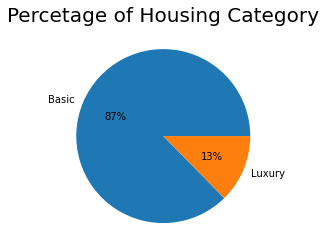

In [ ]:
fig, ax = plt.subplots()
labels = ['Basic','Luxury']
churn = clean_df['category'].value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title('Percetage of Housing Category', fontsize=20)
plt.show()

### Variabel Numerik

In [ ]:
clean_df.describe()

,squareMeters,numberOfRooms,floors,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


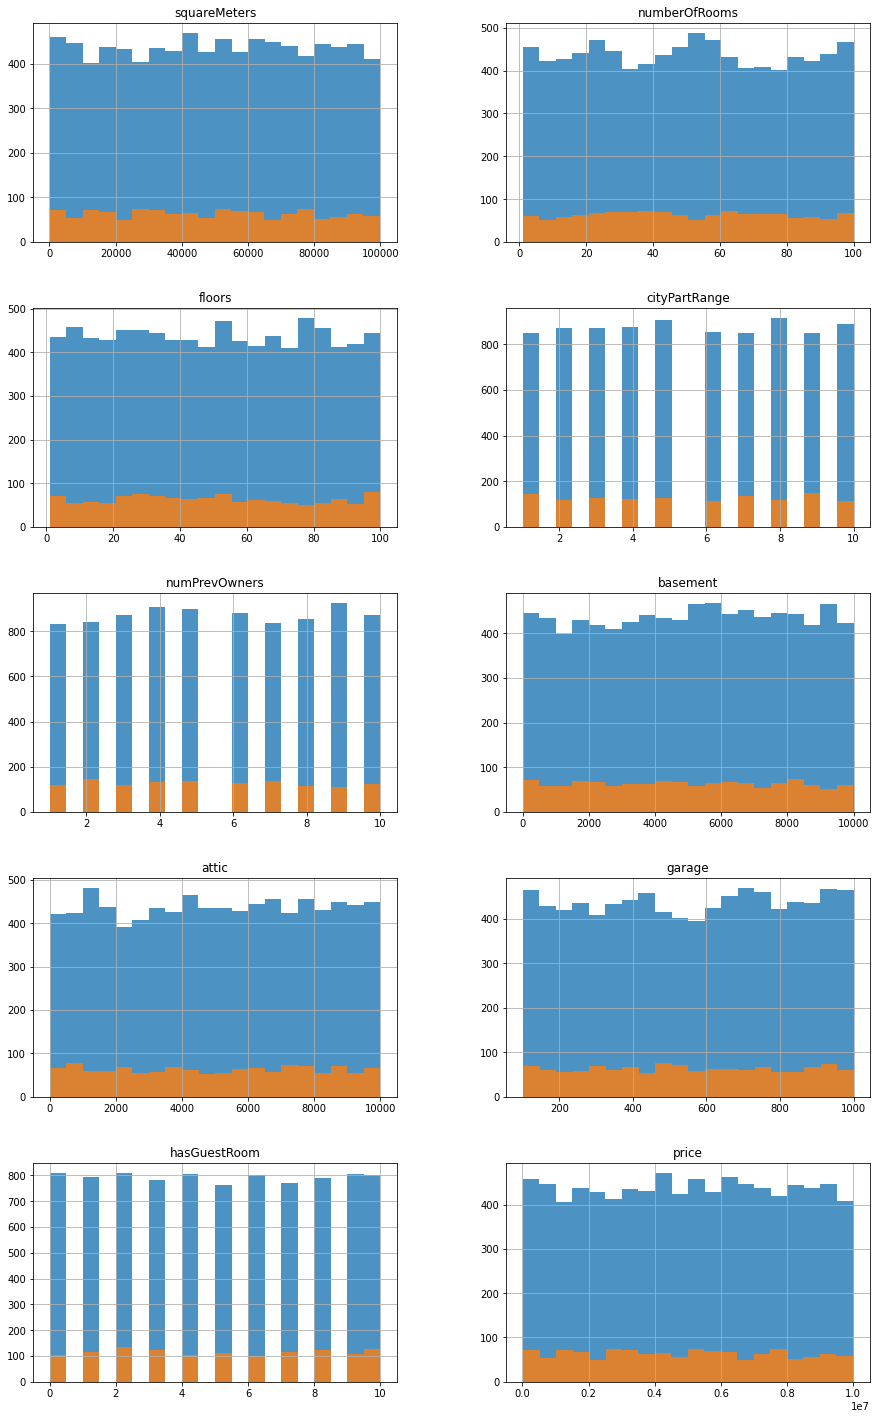

In [ ]:
numerical_columns = ['squareMeters',
                     'numberOfRooms',
                     'floors',
                     'cityPartRange',
                     'numPrevOwners',
                     'basement',
                     'attic',
                     'garage',
                     'hasGuestRoom',
                     'price']

fig, ax = plt.subplots(5, 2, figsize=(15, 25))
clean_df[clean_df.category == 'Basic'][numerical_columns].hist(bins=20, alpha=0.8, ax=ax)
clean_df[clean_df.category == 'Luxury'][numerical_columns].hist(bins=20, alpha=0.8, ax=ax)
plt.show()

### Variabel Kategorik

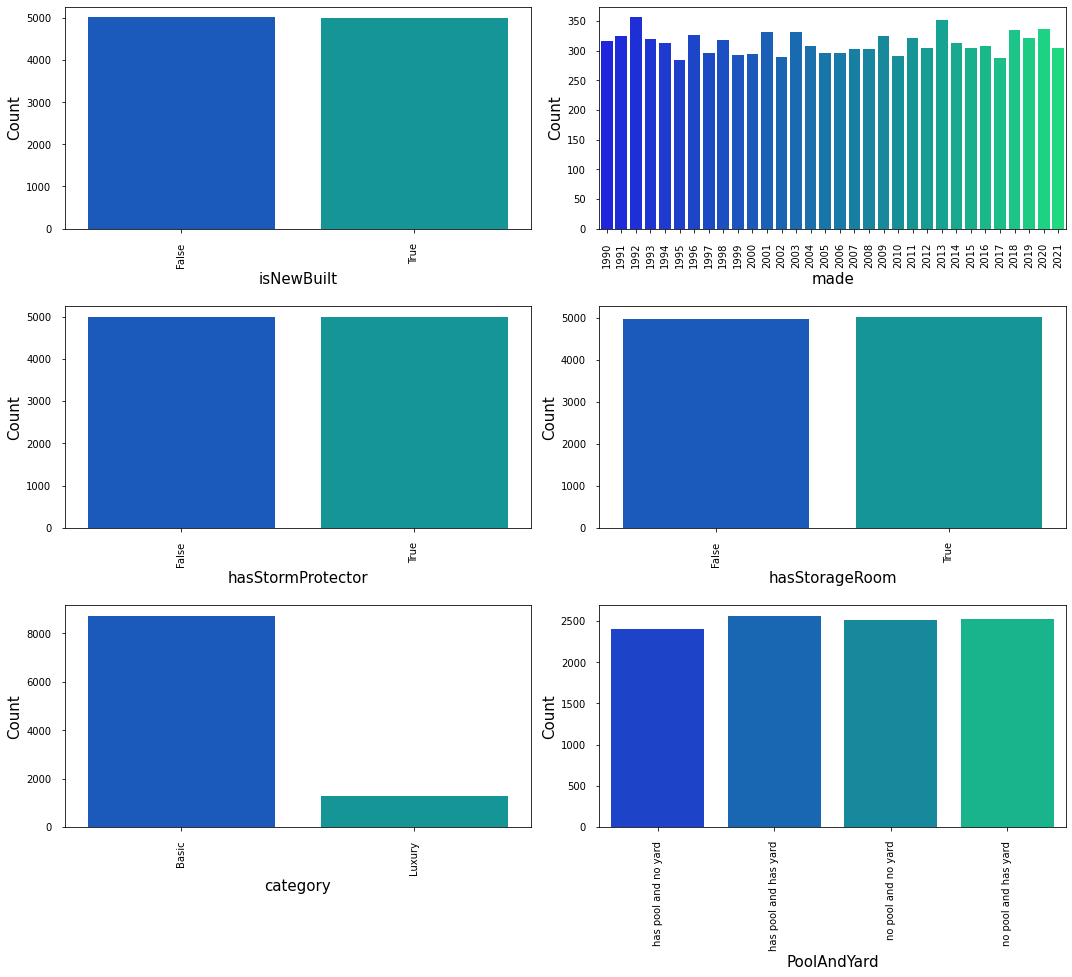

In [ ]:
categorical_columns = ['isNewBuilt', 'made', 'hasStormProtector', 'hasStorageRoom', 'category','PoolAndYard']

plt.figure(figsize = (15,20))
for i in range(0, len(categorical_columns)):
    plt.subplot(5, 2, i+1)
    ax = sns.countplot(x=clean_df[categorical_columns[i]], palette='winter', orient='h')
    ax.tick_params(axis='both', which='major', pad=10)
    plt.tight_layout()
    plt.xticks(rotation=90,fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylabel(ylabel='Count',fontsize=15)
    plt.xlabel(xlabel=categorical_columns[i],fontsize=15)

## Feature Engineering

### Label Encode

In [ ]:
s = (clean_df.dtypes != 'int64')
object_cols = list(s[s].index)

object_cols

['isNewBuilt',
 'hasStormProtector',
 'hasStorageRoom',
 'price',
 'category',
 'PoolAndYard']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

object_cols.remove('price')
object_cols.remove('category')

categorical_data = clean_df[object_cols]

OHE=OneHotEncoder(categories='auto')

feature_arr = OHE.fit_transform(categorical_data).toarray()

ohe_labels = OHE.get_feature_names(object_cols)

features = pd.DataFrame(feature_arr,columns=ohe_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
features

,isNewBuilt_False,isNewBuilt_True,hasStormProtector_False,hasStormProtector_True,hasStorageRoom_False,hasStorageRoom_True,PoolAndYard_has pool and has yard,PoolAndYard_has pool and no yard,PoolAndYard_no pool and has yard,PoolAndYard_no pool and no yard
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9996,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9997,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
LE = LabelEncoder()
clean_df['category'] = LE.fit_transform(clean_df['category'])

In [ ]:
clean_df = clean_df.drop(object_cols, axis=1)
clean_df = pd.concat([clean_df, features], axis=1)

In [ ]:
clean_df

,squareMeters,numberOfRooms,floors,cityPartRange,numPrevOwners,made,basement,attic,garage,hasGuestRoom,price,category,isNewBuilt_False,isNewBuilt_True,hasStormProtector_False,hasStormProtector_True,hasStorageRoom_False,hasStorageRoom_True,PoolAndYard_has pool and has yard,PoolAndYard_has pool and no yard,PoolAndYard_no pool and has yard,PoolAndYard_no pool and no yard
0,75523,3,63,3,8,2005,4313,9005,956,7,7559081.5,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,80771,39,98,8,6,2015,3653,2436,128,2,8085989.5,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,55712,58,19,6,8,2021,2937,8852,135,9,5574642.1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,32316,47,6,10,4,2012,659,7141,359,3,3232561.2,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,70429,19,90,3,7,1990,8435,2429,292,4,7055052.0,1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,5,7,6,2009,9311,1698,218,4,176425.9,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9996,44403,29,12,9,4,1990,9061,1742,230,0,4448474.0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
9997,83841,3,69,10,10,2005,8304,7730,345,9,8390030.5,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
9998,59036,70,96,1,3,2010,2590,6174,339,4,5905107.0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Feature Selection

In [ ]:
X = clean_df.drop(['category', 'made'], axis=1)
y = clean_df['category']

## Pemodelan

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (8000, 20)
y_train dataset shape:  (8000,)
X_test dataset shape:  (2000, 20)
y_test dataset shape:  (2000,)


### Baseline Model

In [ ]:
#Machine learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [ ]:
#Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
#Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

In [ ]:
# Modelling Algorithms
# StratifiedKFold adalah Cross Validation (CV)

kf = StratifiedKFold(n_splits=2,shuffle=True,random_state=42)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
             GaussianNB,
             SVC,
             RandomForestClassifier]

model_name = ['DecisionTreeClassifier',
              'GaussianNB',
              'SVC',
              'RandomForestClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        model = model_type()
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        
        AccTrain.append(model.score(X_train , y_train))
        AccTest.append(model.score(X_test , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))

----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 2
DecisionTreeClassifier Acc Test: [], 1 of KFold 2
DecisionTreeClassifier Recall: [], 1 of KFold 2
DecisionTreeClassifier Precission: [], 1 of KFold 2
DecisionTreeClassifier AUC: [], 1 of KFold 2
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [1.0], 1 of KFold 2
DecisionTreeClassifier Acc Test: [1.0], 1 of KFold 2
DecisionTreeClassifier Recall: [1.0], 1 of KFold 2
DecisionTreeClassifier Precission: [1.0], 1 of KFold 2
DecisionTreeClassifier AUC: [1.0], 1 of KFold 2
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [1.0], 2 of KFold 2
DecisionTreeClassifier Acc Test: [1.0], 2 of KFold 2
DecisionTreeClassifier Recall: [1.0], 2 of KFold 2
DecisionTreeClassifier Precission: [1.0], 2 of KFold 2
DecisionTreeClassifier AUC: [1.0], 2 of KFold 2
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------AFTER------------
SVC Acc Train: [0.8734], 1 of KFold 2
SVC Acc Test: [0.8736], 1 of KFold 2
SVC Recall: [0.0], 1 of KFold 2
SVC Precission: [0.0], 1 of KFold 2
SVC AUC: [0.5], 1 of KFold 2
---------------------------
----------BEFORE------------
SVC Acc Train: [0.8734], 2 of KFold 2
SVC Acc Test: [0.8736], 2 of KFold 2
SVC Recall: [0.0], 2 of KFold 2
SVC Precission: [0.0], 2 of KFold 2
SVC AUC: [0.5], 2 of KFold 2
---------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----------AFTER------------
SVC Acc Train: [0.8734, 0.8736], 2 of KFold 2
SVC Acc Test: [0.8736, 0.8734], 2 of KFold 2
SVC Recall: [0.0, 0.0], 2 of KFold 2
SVC Precission: [0.0, 0.0], 2 of KFold 2
SVC AUC: [0.5, 0.5], 2 of KFold 2
---------------------------
----------FINAL------------
SVC Acc Train: 0.8734999999999999
SVC Acc Test: 0.8734999999999999
SVC Recall: 0.0
SVC Precission: 0.0
SVC AUC: 0.5
---------------------------
----------BEFORE------------
RandomForestClassifier Acc Train: [], 1 of KFold 2
RandomForestClassifier Acc Test: [], 1 of KFold 2
RandomForestClassifier Recall: [], 1 of KFold 2
RandomForestClassifier Precission: [], 1 of KFold 2
RandomForestClassifier AUC: [], 1 of KFold 2
---------------------------
----------AFTER------------
RandomForestClassifier Acc Train: [1.0], 1 of KFold 2
RandomForestClassifier Acc Test: [1.0], 1 of KFold 2
RandomForestClassifier Recall: [1.0], 1 of KFold 2
RandomForestClassifier Precission: [1.0], 1 of KFold 2
RandomForestClassifier AU

In [ ]:
## compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC'] = auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
0,DecisionTreeClassifier,1.0000,1.0000,1.0,1.0,1.0,0.0
3,RandomForestClassifier,1.0000,1.0000,1.0,1.0,1.0,0.0
1,GaussianNB,0.8735,0.8735,0.0,0.0,0.5,0.0
2,SVC,0.8735,0.8735,0.0,0.0,0.5,0.0


### DecisionTreeClassifier 

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [ ]:
report = classification_report(y_true=y_test, y_pred=model.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4367
           1       1.00      1.00      1.00       633

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



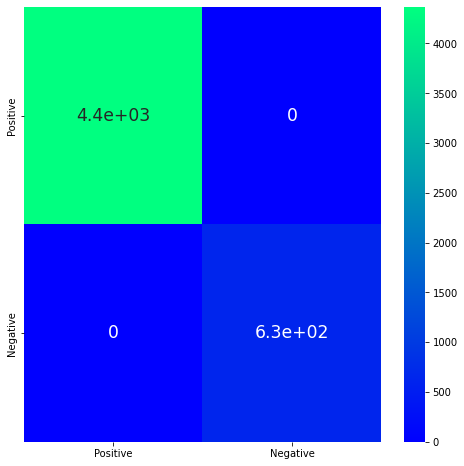

In [ ]:
confusion = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='winter')

plt.show()

#### Feature Importance

In [ ]:
import plotly.graph_objects as go

model.fit(X_train, y_train)
fig = go.Figure(go.Bar(
            x=model.feature_importances_,
            y=X_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(title='<b>Estimating feature importance through the DecisionTreeClassifier model', title_x=0.5, 
                 xaxis_title="Feature importance", yaxis_title='Feature', barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

### RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
y_pred=random_forest.predict(X_test)

In [ ]:
report_random_forest = classification_report(y_true=y_test, y_pred=random_forest.predict(X_test))
print(report_random_forest)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4367
           1       1.00      1.00      1.00       633

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



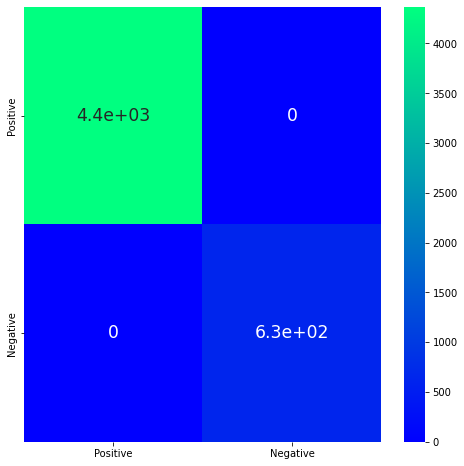

In [ ]:
confusion_random_forest = confusion_matrix(y_true=y_test, y_pred=random_forest.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion_random_forest,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='winter')

plt.show()

#### Feature Importance

In [ ]:
random_forest.fit(X_train, y_train)
fig = go.Figure(go.Bar(
            x=random_forest.feature_importances_,
            y=X_train.columns,
            orientation='h', marker_color='steelblue'))
fig.update_layout(title='<b>Estimating feature importance through the RandomForestClassifier model', title_x=0.5, 
                 xaxis_title="Feature importance", yaxis_title='Feature', barmode='stack', yaxis={'categoryorder':'total ascending'})

fig.show()

## Evaluasi

### RandomForestClassifier

#### Hyperparameter Tuning

In [ ]:
#Grid Search
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()

param_RFC = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 10, 20, 40, 80, 160, 320, 640],
    'criterion' :['gini', 'entropy']
}

cv = StratifiedKFold(n_splits=2)

rfc = GridSearchCV(estimator=rf_classifier, 
                 param_grid=param_RFC,
                 cv = cv, 
                 verbose=4)

rfc.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits
[CV 1/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=1.000 total time=   0.4s
[CV 2/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200;, score=1.000 total time=   0.4s
[CV 1/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=1.000 total time=   1.0s
[CV 2/2] END criterion=gini, max_depth=5, max_features=auto, n_estimators=500;, score=1.000 total time=   1.5s
[CV 1/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=1.000 total time=   0.4s
[CV 2/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=200;, score=1.000 total time=   0.4s
[CV 1/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500;, score=1.000 total time=   1.1s
[CV 2/2] END criterion=gini, max_depth=5, max_features=sqrt, n_estimators=500;, score=1.000 total time=   1.0s
[CV 1/2] END criterion=gini, max_depth=5, max_feat

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 80, 160, 320, 640],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=4)

In [ ]:
print('Best Score: {}'.format(rfc.best_score_))
print('Best Hyperparameters: {}'.format(rfc.best_params_))

Best Score: 1.0
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train dataset shape: ", X_train.shape)
print("y_train dataset shape: ", y_train.shape)
print("X_test dataset shape: ", X_test.shape)
print("y_test dataset shape: ", y_test.shape)

X_train dataset shape:  (8000, 20)
y_train dataset shape:  (8000,)
X_test dataset shape:  (2000, 20)
y_test dataset shape:  (2000,)


In [ ]:
# Buat Model Pakai Best Param Dari GridSearchCV
modeltun = RandomForestClassifier(**rfc.best_params_)

In [ ]:
# Melatih Model Pakai data train kita
model_fit = modeltun.fit(X_train,y_train)

In [ ]:
# Cek Peforma model kita di data latih
y_pred_train=model_fit.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6991
           1       1.00      1.00      1.00      1009

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



In [ ]:
# Cek Peforma model kita di data test
y_pred_test=model_fit.predict(X_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1744
           1       1.00      1.00      1.00       256

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



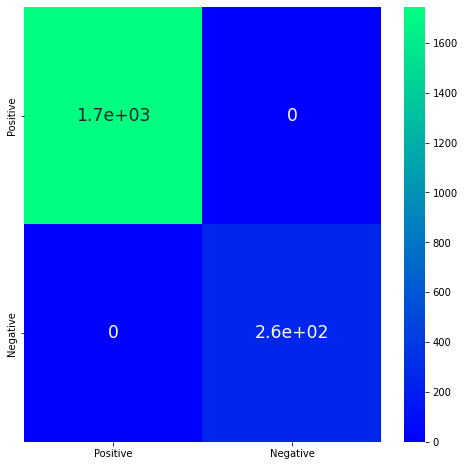

In [ ]:
confusion = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
plt.figure(figsize=(8, 8))
sns.heatmap(confusion,
            xticklabels=["Positive", "Negative"],
            yticklabels=["Positive", "Negative"],
            annot=True, 
            annot_kws={"fontsize": "xx-large"},
            cmap='winter')

plt.show()

>Confusion Matrix dari Data Testing menunjukan bahwa nilai dari FP (False Positive) dan nilai dari FN (False Negative) seimbang (Symetric) yaitu `0 : 0`, sehingga metrik yang kami gunakan adalah `accuracy` dengan skor `1.0`

# END